In [10]:
from libs.dataset.female_births import DailyTotalFemaleBirthDataset
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import numpy as np

In [32]:
def prepare_data(dataset: Dataset):
    _x = []
    _y = []

    for i in range(len(dataset)):
        _x.append(dataset[i][0][:, 1])
        _y.append(dataset[i][1][1])

    return _x, _y


dataset_train = DailyTotalFemaleBirthDataset(
    data_path="./data/daily-total-female-births/", train=True
)

dataset_test = DailyTotalFemaleBirthDataset(
    data_path="./data/daily-total-female-births/", train=False
)

train_x, train_y = prepare_data(dataset_train)
test_x, test_y = prepare_data(dataset_test)

# normalize train and test data
train_x = np.array(train_x).astype(np.float32)
train_y = np.array(train_y).astype(np.float32)
test_x = np.array(test_x).astype(np.float32)
test_y = np.array(test_y).astype(np.float32)

train_x_mean = train_x.mean(axis=0)
train_y_mean = train_y.mean(axis=0)

train_x_std = train_x.std(axis=0)
train_y_std = train_y.std(axis=0)

train_x = (train_x - train_x_mean) / train_x_std
train_y = (train_y - train_y_mean) / train_y_std

test_x = (test_x - train_x_mean) / train_x_std
test_y = (test_y - train_y_mean) / train_y_std

In [33]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(train_x, train_y)

RandomForestRegressor(n_estimators=1000)

In [34]:
yhat = model.predict(test_x)

# calculate mae
mae = np.mean(np.abs(yhat - test_y))
print("MAE: %.3f" % mae)

MAE: 5.321


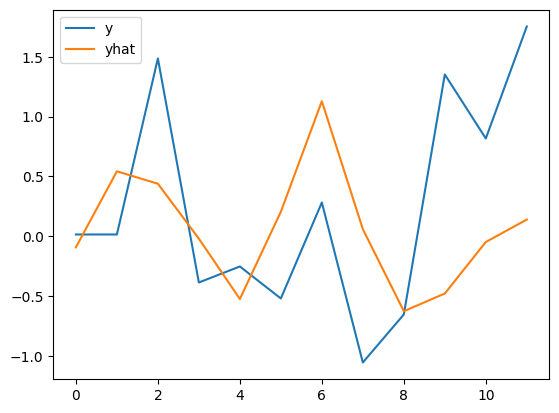

In [27]:
plt.plot(test_y[-12:], label="y")
plt.plot(yhat[-12:], label="yhat")
plt.legend()
plt.show()